In [1]:
from michigrad.engine import Value
from michigrad.nn import Layer
from michigrad.visualize import show_graph

In [2]:
# Datos para entrenar al modelo

# 4 arreglos con 2 Value cada uno 
Xs = [
    [Value(0.0), Value(0.0)],
    [Value(1.0), Value(0.0)],
    [Value(0.0), Value(1.0)],
    [Value(1.0), Value(1.0)],
]

Ys = [
    Value(0.0),
    Value(1.0),
    Value(1.0),
    Value(0.0),
]

In [6]:
# Entrenamiento del modelo

# Declaración de una capa con 2 neuronales lineales
model = Layer(2, 2, nonlin=False)

# Cada neurona ejecuta
# Output = (w1 * x1) + (w2 * x2) + b
def predict(x):
    out = model(x)
    # Se combinan los resultados de ambas neuronas en un solo valor
    aux = out[0] + out[1]
    return aux;

N = len(Ys)
learning_rate = 0.01
L = Value(0)

for i in range(400):
    
    # Forward pass
    yhat = [predict(x) for x in Xs]

    # Calculo Loss function
    L = sum( (y - ypred)**2 for y, ypred in zip(Ys, yhat) ) * (Value(1) / Value(N))
    L.name = "L"
    
    # Gradiente en cero
    model.zero_grad()

    # Backpropagation
    L.backward()

    # Update
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    print(f'Iteracion={i}, L={L.data:.5f}')

Iteracion=0, L=0.33929
Iteracion=1, L=0.33729
Iteracion=2, L=0.33542
Iteracion=3, L=0.33367
Iteracion=4, L=0.33201
Iteracion=5, L=0.33045
Iteracion=6, L=0.32897
Iteracion=7, L=0.32757
Iteracion=8, L=0.32622
Iteracion=9, L=0.32494
Iteracion=10, L=0.32371
Iteracion=11, L=0.32253
Iteracion=12, L=0.32139
Iteracion=13, L=0.32029
Iteracion=14, L=0.31923
Iteracion=15, L=0.31820
Iteracion=16, L=0.31720
Iteracion=17, L=0.31622
Iteracion=18, L=0.31527
Iteracion=19, L=0.31435
Iteracion=20, L=0.31345
Iteracion=21, L=0.31256
Iteracion=22, L=0.31170
Iteracion=23, L=0.31085
Iteracion=24, L=0.31003
Iteracion=25, L=0.30921
Iteracion=26, L=0.30841
Iteracion=27, L=0.30763
Iteracion=28, L=0.30686
Iteracion=29, L=0.30610
Iteracion=30, L=0.30536
Iteracion=31, L=0.30463
Iteracion=32, L=0.30391
Iteracion=33, L=0.30320
Iteracion=34, L=0.30250
Iteracion=35, L=0.30181
Iteracion=36, L=0.30113
Iteracion=37, L=0.30047
Iteracion=38, L=0.29981
Iteracion=39, L=0.29916
Iteracion=40, L=0.29852
Iteracion=41, L=0.29789
It

Valor final Loss function : 0.25050
Predicciones finales: [0.46374878261742186, 0.4962516817958399, 0.49237053510092965, 0.5248734342793477]


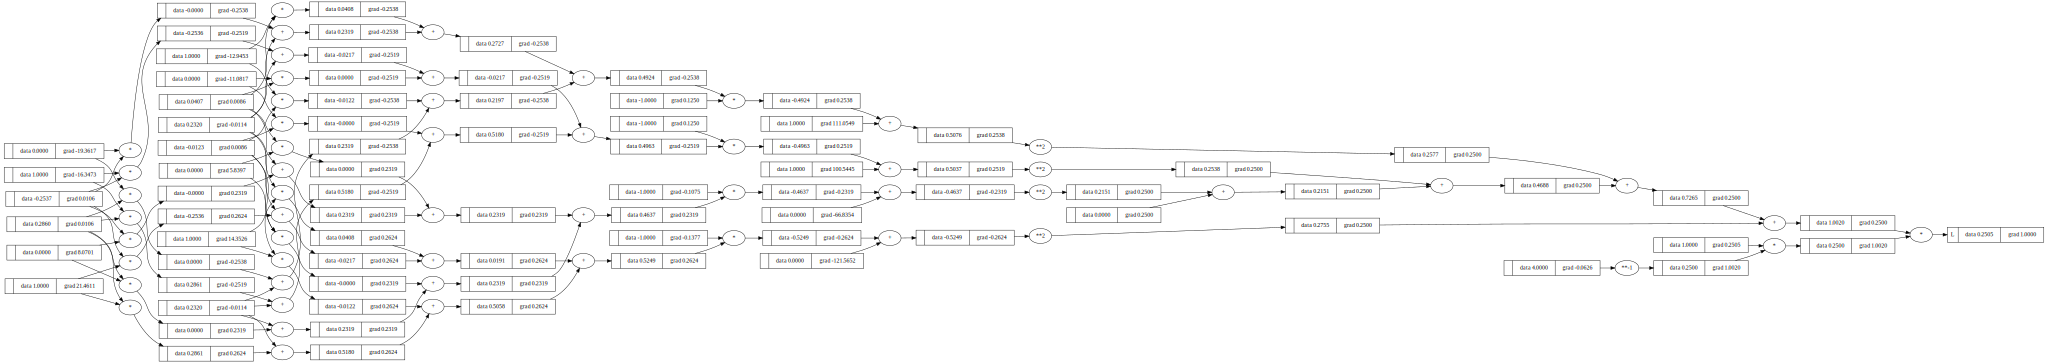

In [7]:
# Impresión de resultados

print(f"Valor final Loss function : {L.data:.5f}")
print("Predicciones finales:", [y.data for y in yhat])
show_graph(L)